<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

# Librerías

Cargando las bibliotecas que necesitamos 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Instrucciones

* 1. Cada inciso de los diferentes ejercicios tendrá que resolverse con los dos estilos 
* 2. Se ha colocado en cada ejercicio los datos a utilizar, si es necesario modifíquelos hasta tener un DataFrame que pueda usar para resolver cada uno de los incisos
* 3. No se aceptarán ejercicios usando funciones de graficas de pandas, por ejemplo  *df.iloc[0].plot(kind = 'bar')*  
* 4. Los datos de "Pacientes confirmados con Covid en México" se obtuvieron el día 30 de Noviembre a las 2pm
* 5. Puede agregar todas las opciones de visualización que crea convenientes, pueden ser diferentes para ambos estilos 


## Ejercicio 1:  Datos de la estación meteorologica de Progreso, Yucatán

Fuente:  https://smn.conagua.gob.mx/es/observando-el-tiempo/estaciones-meteorologicas-automaticas-ema-s

In [2]:
df= pd.read_csv("datos/Estacion_PROGRESO_90_dias_19Nov.csv")
df.head()

,FechaLocal,FechaUTC,TemperaturaAire(C),Precipitacion(mm),HumedadRelativa(%),PresionAtmosferica(hpa),RadiacionSolar(W/m2),DireccionViento(grados),RapidezViento(km/h),DireccionRafaga(grados),RapidezRafaga(km/h)
0,19/11/2020 15:20,19/11/2020 21:20,28,0,72,1017.0,226.0,59.0,28.0,115.0,46.0
1,19/11/2020 15:10,19/11/2020 21:10,28,0,73,1017.0,445.0,59.0,27.0,103.0,43.0
2,19/11/2020 15:00,19/11/2020 21:00,28,0,74,1017.0,475.0,60.0,28.0,97.0,53.0
3,19/11/2020 14:50,19/11/2020 20:50,28,0,75,1017.0,359.0,59.0,27.0,94.0,51.0
4,19/11/2020 14:40,19/11/2020 20:40,28,0,74,1017.0,550.0,63.0,27.0,99.0,48.0


<div class="alert alert-success">

1. Considerando todos los datos hacer una grafica de dispersión para la Temperatura de Aire (en el eje Y) y la Humadad Relativa (en el eje X) 
</ul>
</div>

In [3]:
TemperaturaAire_values = list(df['TemperaturaAire(C)'].values)
HumedadRelativa_values = list(df['HumedadRelativa(%)'].values)

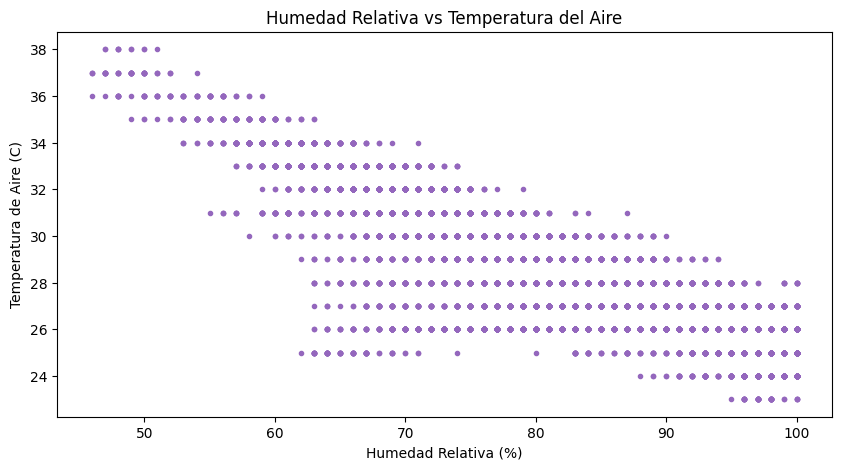

In [4]:
#Estilo Matlab
plt.figure(figsize=(10,5)) 
plt.scatter(HumedadRelativa_values, TemperaturaAire_values, c='C4', marker=".")
plt.xlabel('Humedad Relativa (%)')
plt.ylabel('Temperatura de Aire (C)')
plt.title('Humedad Relativa vs Temperatura del Aire')
plt.show()

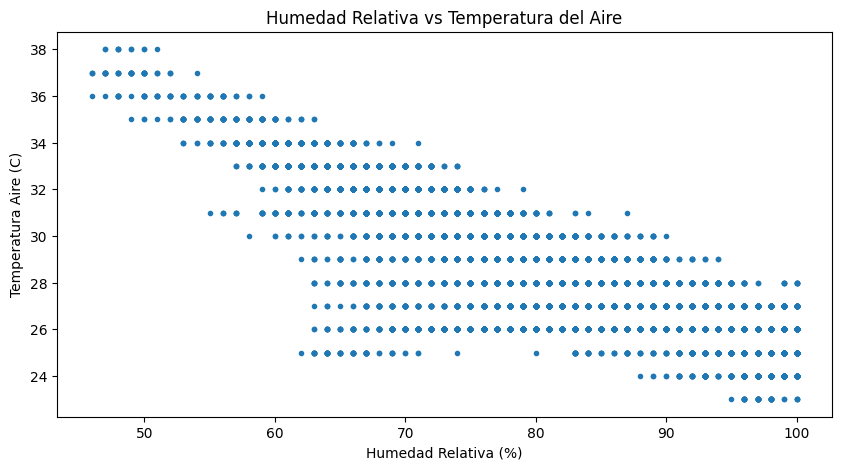

In [5]:
#Estilo Oriendado a Objetos
fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(HumedadRelativa_values, TemperaturaAire_values, c = 'C0', marker='.')
ax.set(title='Humedad Relativa vs Temperatura del Aire', xlabel="Humedad Relativa (%)", ylabel="Temperatura Aire (C)")

plt.show()


<div class="alert alert-success">
    
2. Considerando todos los datos, hacer un histograma de los valores de la Rapidez Viento 
    
</div> 

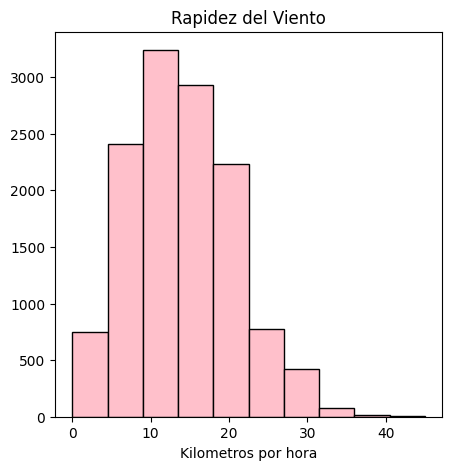

In [6]:
#Estilo matlab

plt.figure(figsize=(5,5))
plt.hist(df['RapidezViento(km/h)'], color='pink', ec='black')
plt.xlabel('Kilometros por hora')
plt.title('Rapidez del Viento')
plt.show()

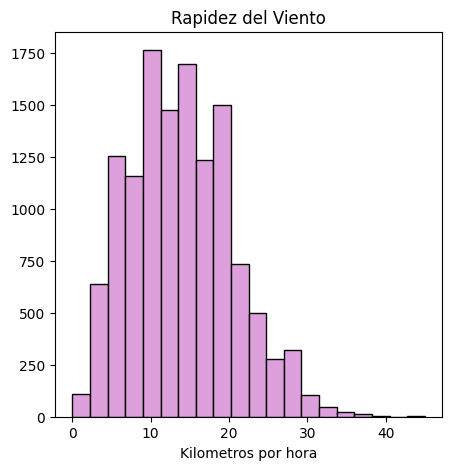

In [7]:
#Estilo OOP
fig, ax = plt.subplots(figsize=(5,5))

ax.hist(df['RapidezViento(km/h)'], bins=20, color='plum', ec='black')
ax.set(title='Rapidez del Viento', xlabel='Kilometros por hora')
plt.show()

# Ejercicio 2: Incendios en México

In [8]:
df2= pd.read_csv("datos/Serie_historica_anual_incendios_2017.csv")

<div class="alert alert-success">
    
1. Utilizar una grafica de barras para comparar el total de hectáreas afectadas para los 5 estados más afectados 
    
</div> 

In [9]:
estados_afec_hect = df2.groupby('Estado')['Total Hectareas'].sum().sort_values(ascending=False).head().sort_values()
estados_afec_hect

Estado
Oaxaca              41718
Baja California     50957
Chihuahua           87285
Sonora             101072
Jalisco            189816
Name: Total Hectareas, dtype: int64

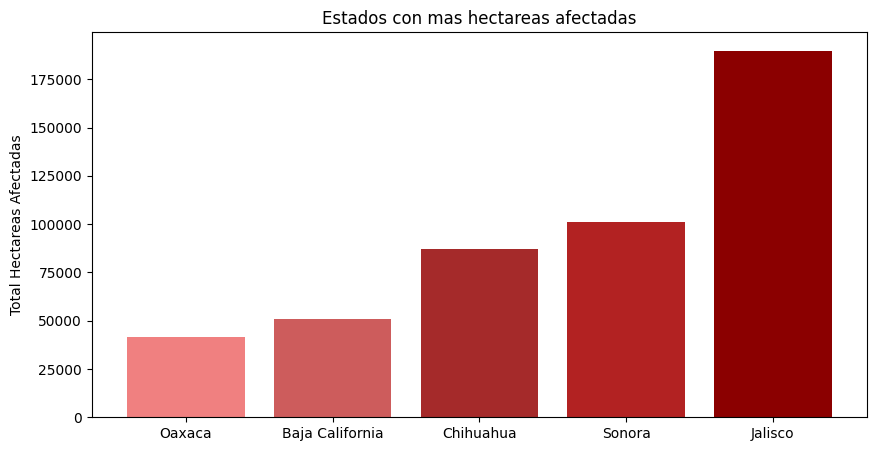

In [10]:
#Estilo matlab

plt.figure(figsize=(10,5))
plt.bar(estados_afec_hect.index, estados_afec_hect.to_numpy(), color=('lightcoral', 'indianred', 'brown','firebrick', 'darkred'))
plt.ylabel('Total Hectareas Afectadas')
plt.title('Estados con mas hectareas afectadas')
plt.show()

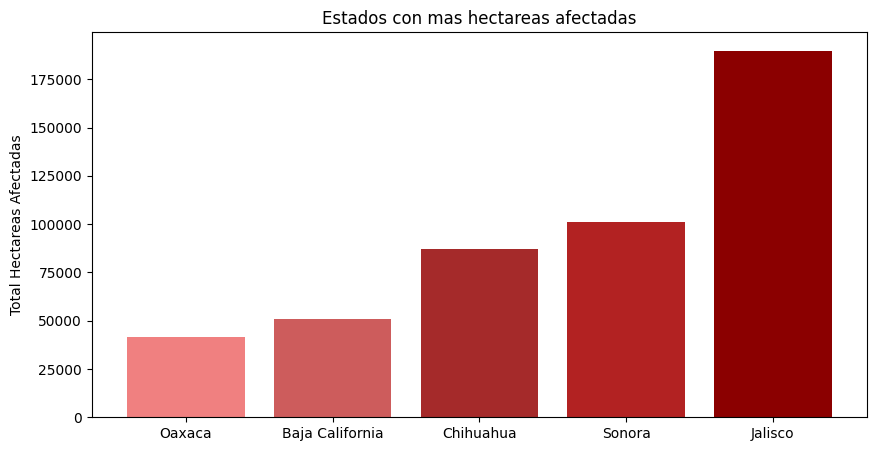

In [11]:
#Estilo OOP

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(estados_afec_hect.index, estados_afec_hect.to_numpy(), color=('lightcoral', 'indianred', 'brown','firebrick', 'darkred'))
ax.set(title='Estados con mas hectareas afectadas', ylabel='Total Hectareas Afectadas')
plt.show()

<div class="alert alert-success">
    
2. Utilizar una grafica de barras para comparar el total de hectáreas afectadas para Yucatán para los meses: abril, mayo, junio, julio y agosto 
    
</div> 

In [12]:
meses = ('abril','mayo','junio','julio','agosto')
filtro1 = df2[(df2['Estado'] == 'Yucatán') & (df2['Mes Acontecimiento'].isin(('abril','mayo','junio','julio','agosto')))].groupby('Mes Acontecimiento')['Total Hectareas'].sum()
hect_yuc_meses = filtro1.reindex(meses, fill_value=0)
hect_yuc_meses.index = pd.Index([mes.capitalize() for mes in meses])

hect_yuc_meses


Abril      975
Mayo      1943
Junio        0
Julio        0
Agosto    1928
Name: Total Hectareas, dtype: int64

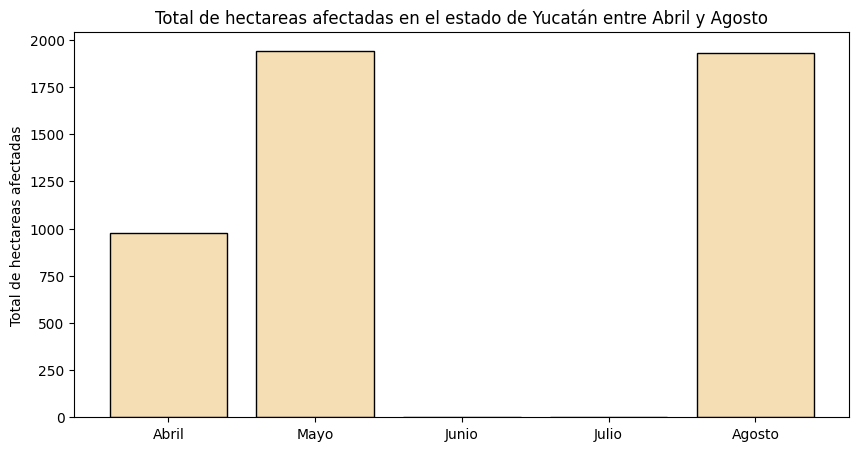

In [13]:
#Estilo matlab
plt.figure(figsize=(10,5))
plt.bar(hect_yuc_meses.index, hect_yuc_meses.to_numpy(), ec='black', color='wheat')
plt.ylabel('Total de hectareas afectadas')
plt.title('Total de hectareas afectadas en el estado de Yucatán entre Abril y Agosto')
plt.show()

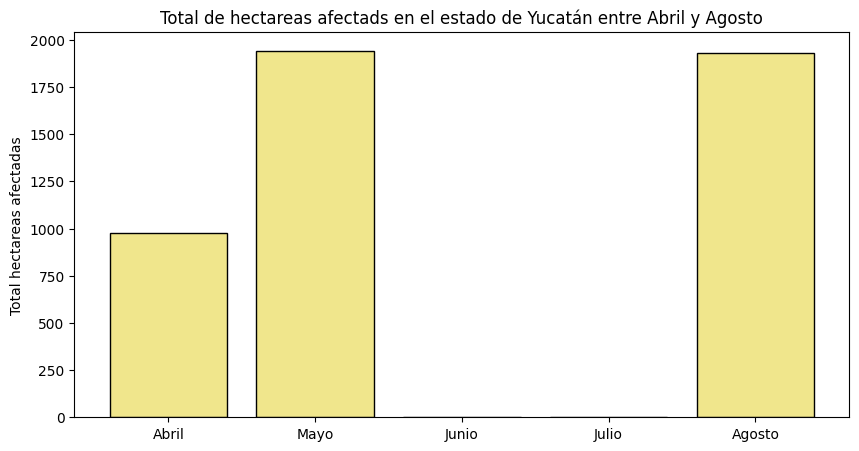

In [14]:
#Estilo OOP
fig,ax = plt.subplots(figsize=(10,5))

ax.bar(hect_yuc_meses.index, hect_yuc_meses.to_numpy(), ec='black', color='khaki')
ax.set(title='Total de hectareas afectads en el estado de Yucatán entre Abril y Agosto', ylabel='Total hectareas afectadas')
plt.show()

<div class="alert alert-success">
    
3. Considerando todos los datos, hacer un histograma de la duración de los incendios 
    
</div> 

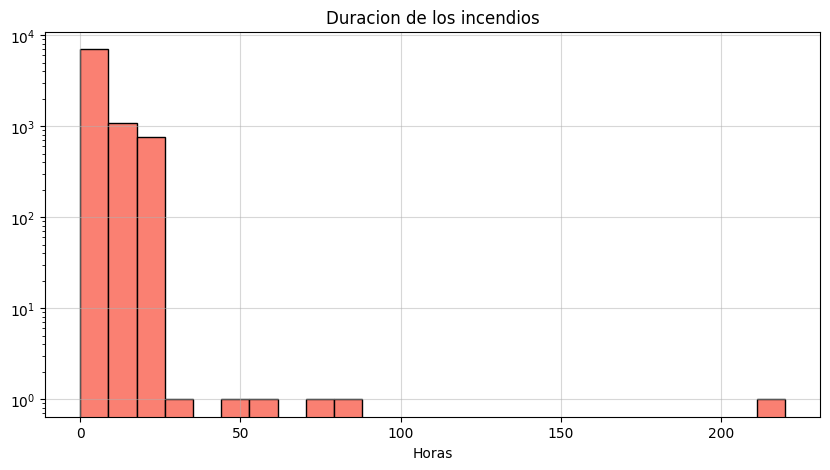

In [15]:
#Estilo matplab
plt.figure(figsize=(10,5))
plt.hist(df2['Duracion H'], bins=25,log=True,color='salmon', ec='black',)
plt.xlabel('Horas')
plt.title('Duracion de los incendios')
plt.grid(True, alpha=0.5)
plt.show()

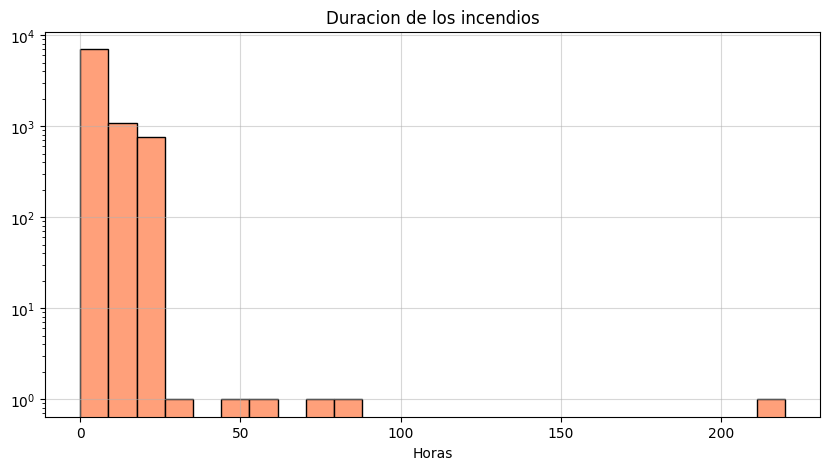

In [16]:
#Estilo OOP
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(df2['Duracion H'], bins=25,log=True,color='lightsalmon', ec='black',)
ax.set(title='Duracion de los incendios', xlabel='Horas')
ax.grid(True, alpha=0.5)
plt.show()

<div class="alert alert-success">
    
4. Considerando todos los datos, hacer una grafica de dispersión entre la duración (eje X) y el total de hectáreas (eje Y)
    
</div> 

In [17]:
duracion_vs_hect = df2.groupby('Duracion H')['Total Hectareas'].mean()
duracion_vs_hect

Duracion H
0.00      163.204918
0.03        1.000000
0.09        9.000000
0.11       20.000000
0.17       54.666667
             ...    
47.08     146.000000
53.12      54.000000
75.20       1.000000
80.00       2.000000
220.00    148.000000
Name: Total Hectareas, Length: 537, dtype: float64

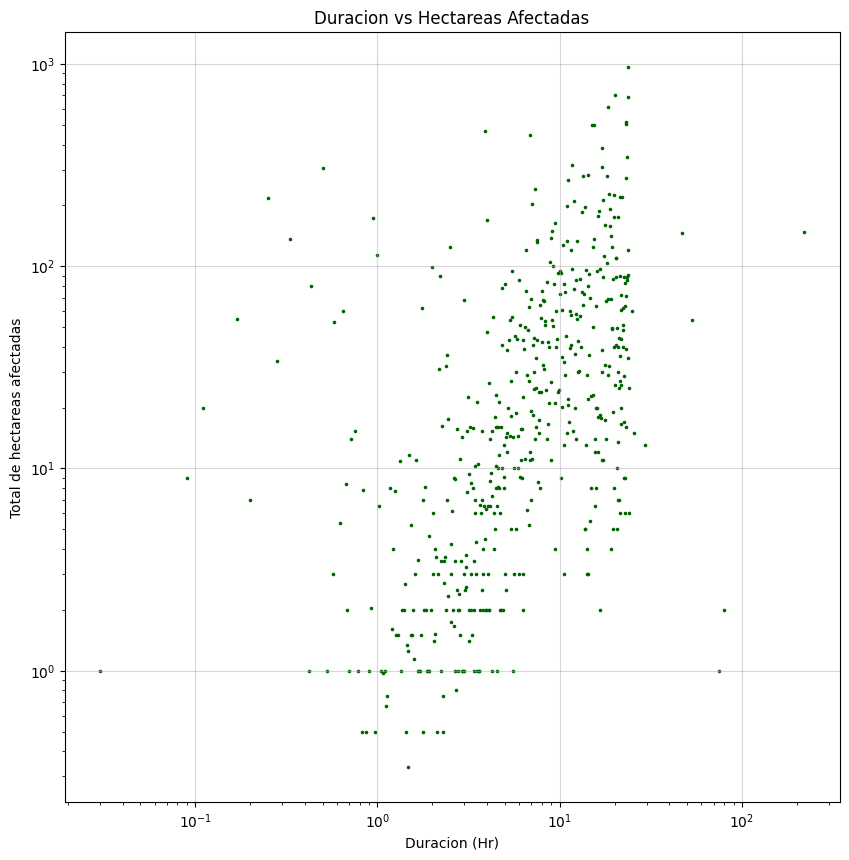

In [18]:
#Estilo matlab
plt.figure(figsize=(10,10))
plt.scatter(duracion_vs_hect.index, duracion_vs_hect, marker='.', s=10, c='darkgreen')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Duracion (Hr)')
plt.ylabel('Total de hectareas afectadas')
plt.title('Duracion vs Hectareas Afectadas')
plt.grid(True, alpha=0.5)
plt.show()

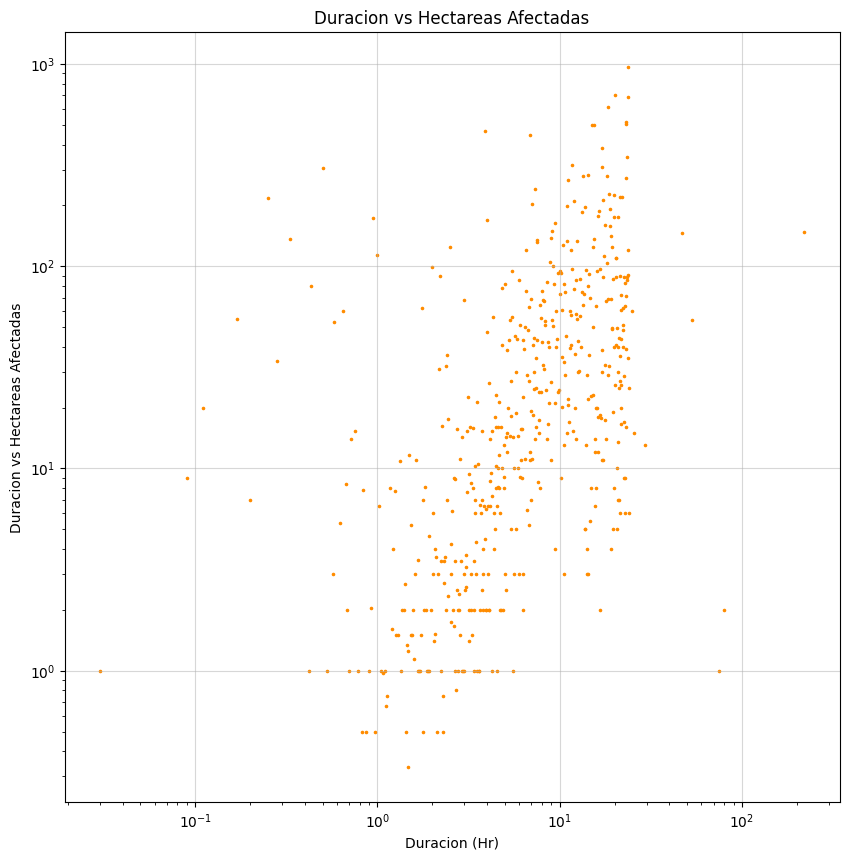

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(duracion_vs_hect.index, duracion_vs_hect, marker='.', s=10, c='darkorange')
ax.set(title='Duracion vs Hectareas Afectadas', xlabel='Duracion (Hr)', ylabel='Duracion vs Hectareas Afectadas', xscale='log', yscale='log')
ax.grid(True, alpha=0.5)
plt.show()

# Ejercicio 3: Pacientes confirmados con Covid en México


Fuente: https://datos.covid-19.conacyt.mx/#DownZCSV

In [20]:
df3= pd.read_csv("datos/Casos_Diarios_Estado_Nacional_Confirmados_20201129.csv")
df3.head()

,cve_ent,poblacion,nombre,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,20-11-2020,21-11-2020,22-11-2020,23-11-2020,24-11-2020,25-11-2020,26-11-2020,27-11-2020,28-11-2020,29-11-2020
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,184,30,19,207,176,90,14,2,0,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,132,84,61,147,137,88,70,45,2,0
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,68,36,30,67,72,76,79,49,0,0
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,9,2,6,13,7,8,5,0,0,0
4,7,5730367,CHIAPAS,0,0,0,0,0,0,0,...,13,0,4,6,3,5,8,1,0,0


In [21]:
df3_fix = df3.loc[:,'nombre':].set_index('nombre').T
df3_fix.index = pd.to_datetime(df3_fix.index, dayfirst=True)
df3_fix.head()

nombre,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,DURANGO,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
2020-01-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df3_fix.tail()

nombre,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,DURANGO,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
2020-11-25,90,88,76,8,5,77,1703,260,10,212,...,85,33,47,149,80,23,53,77,269,5687
2020-11-26,14,70,79,5,8,34,1499,172,7,268,...,12,27,25,60,45,14,12,50,212,4123
2020-11-27,2,45,49,0,1,9,1380,157,7,133,...,5,11,40,43,20,12,2,18,132,2705
2020-11-28,0,2,0,0,0,1,704,8,0,0,...,0,0,6,0,0,1,0,2,36,873
2020-11-29,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<div class="alert alert-success">
    
1. Hacer una grafica de barras comparando todos los meses, considerando el total nacional (por mes) 
    
</div> 

In [23]:
meses = ('Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre')
casos_meses_nacional = df3_fix.resample('ME')['Nacional'].sum()

casos_meses_nacional.index = pd.Index([mes for mes in meses])

casos_meses_nacional

Enero              3
Febrero           12
Marzo           2885
Abril          27722
Mayo           88530
Junio         155634
Julio         210434
Agosto        168569
Septiembre    144164
Octubre       165568
Noviembre     143550
Name: Nacional, dtype: int64

Text(0.5, 1.0, 'Casos de COVID-19 (2020)')

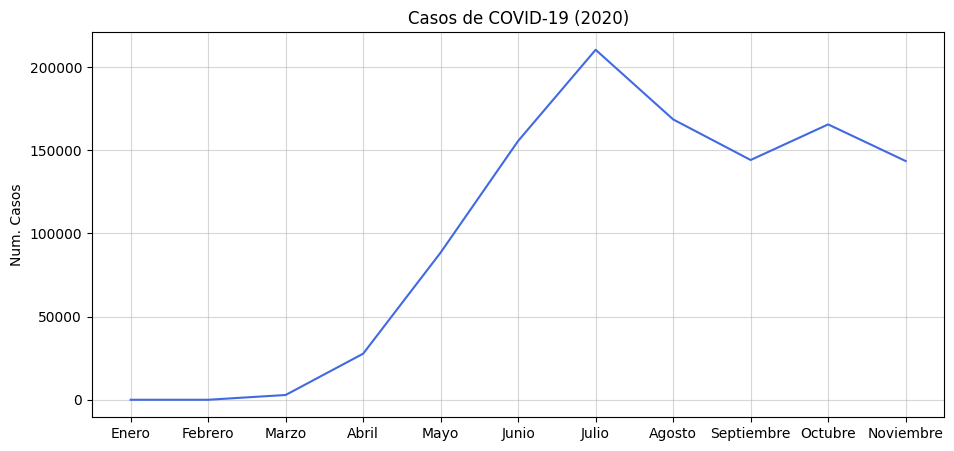

In [24]:
#Estilo matlab
plt.figure(figsize=(11,5))
plt.plot(casos_meses_nacional, c='royalblue')
plt.ylabel('Num. Casos')
plt.grid(True, alpha=0.5)
plt.title('Casos de COVID-19 (2020)')

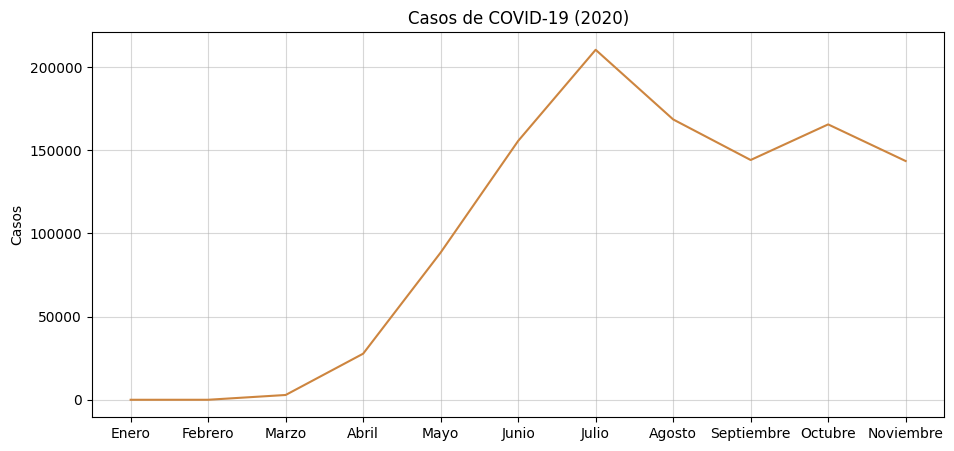

In [25]:
#Estilo OOP
fig, ax = plt.subplots(figsize=(11,5))

ax.plot(casos_meses_nacional, c='peru')
ax.set(title='Casos de COVID-19 (2020)', ylabel='Casos')
ax.grid(True, alpha=0.5)

<div class="alert alert-success">
    
2. Hacer una grafica de barras comparando  los meses de agosto, septiembre, octubre y noviembre, considerando solo las entidades de Yucatán, Distrito Federal  y Jalisco
    
</div> 

In [26]:
casos_meses_2 = df3_fix.resample('ME')[['YUCATAN','DISTRITO FEDERAL', 'JALISCO']].sum()
casos_meses_2.index = pd.Index([mes for mes in meses])
casos_meses_2 = casos_meses_2.loc[['Agosto','Septiembre','Octubre','Noviembre']]

casos_meses_2

nombre,YUCATAN,DISTRITO FEDERAL,JALISCO
Agosto,4629,25997,6448
Septiembre,3504,28661,6841
Octubre,2898,37001,7165
Noviembre,2054,32848,5665


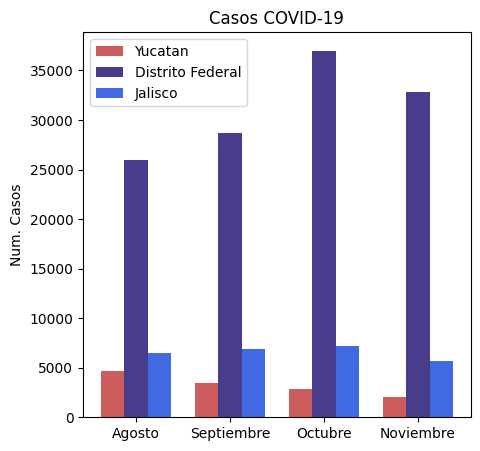

In [27]:
#Estilo matlab
w = 0.25
x = np.arange(len(casos_meses_2.index))

plt.figure(figsize=(5,5))
plt.bar(x-w, casos_meses_2['YUCATAN'],width=w,color='indianred', label='Yucatan')
plt.bar(x, casos_meses_2['DISTRITO FEDERAL'], width=w, color='darkslateblue', label='Distrito Federal')
plt.bar(x+w, casos_meses_2['JALISCO'], width=w, color='royalblue', label='Jalisco')
plt.title('Casos COVID-19')
plt.ylabel('Num. Casos')
plt.xticks(x, labels=list(casos_meses_2.index))
plt.legend()

plt.show()

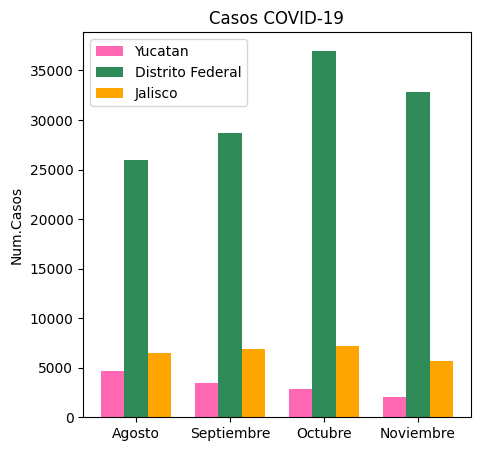

In [29]:
#Estilo OOP

fig, ax = plt.subplots(figsize=(5,5))
ax.bar(x-w, casos_meses_2['YUCATAN'],width=w,color='hotpink', label='Yucatan')
ax.bar(x, casos_meses_2['DISTRITO FEDERAL'], width=w, color='seagreen', label='Distrito Federal')
ax.bar(x+w, casos_meses_2['JALISCO'], width=w, color='orange', label='Jalisco')
ax.set(title="Casos COVID-19", ylabel='Num.Casos', xticks=x, xticklabels = list(casos_meses_2.index))

ax.legend()